<a href="https://colab.research.google.com/github/sp-au-mu-nl/PythonMedia/blob/main/notebook/chap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap10.zip
!unzip chap10.zip
!rm chap10.zip

--2025-06-26 07:15:36--  https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap10.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap10.zip [following]
--2025-06-26 07:15:37--  https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap10.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12549580 (12M) [application/zip]
Saving to: ‘chap10.zip’

chap10.zip          100%[===================>]  11.97M  --.-KB/s    in 0.1s    

2025-06-26 07:15:37 (94.3 MB/s) - ‘chap10.zip’ saved [12549580/12549580]

Archiv

In [2]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
from scipy import ndimage, spatial
import skimage as ski
import cv2
import plotly.express as px
#import plotly.graph_objects as go

In [3]:
x=np.array([[1,2]]).T
t=np.pi/4
A=np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]])
u=A@x
u

array([[-0.70710678],
       [ 2.12132034]])

(np.float64(-0.7924621202458747),
 np.float64(1.0853553390593274),
 np.float64(-0.10606601717798214),
 np.float64(2.2273863607376247))

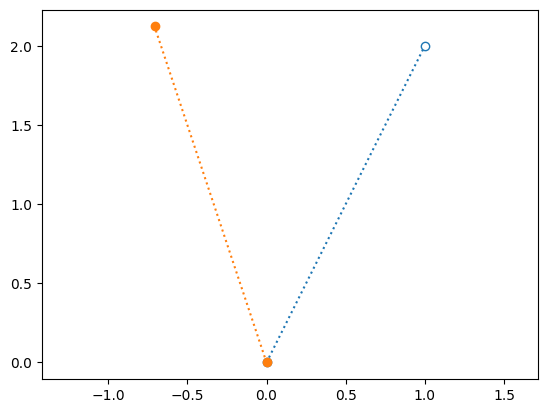

In [4]:
plt.plot([0,x[0][0]],[0,x[1][0]],'o:',markerfacecolor='white')
plt.plot([0,u[0][0]],[0,u[1][0]],'o:')
plt.axis('equal')

(np.float64(-1.5349242404917496),
 np.float64(1.1207106781186547),
 np.float64(-1.5849242404917496),
 np.float64(2.1707106781186547))

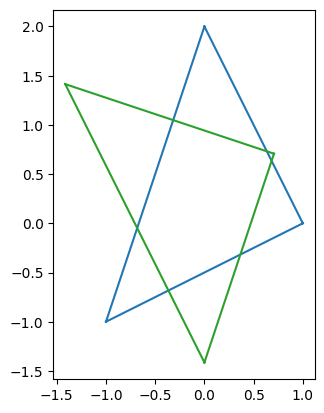

In [5]:
tri=np.array([[0,-1,1],[2,-1,0]])
plt.triplot(tri[0,:],tri[1,:])
tt=A@tri
plt.triplot(tt[0,:],tt[1,:])
plt.axis('scaled')

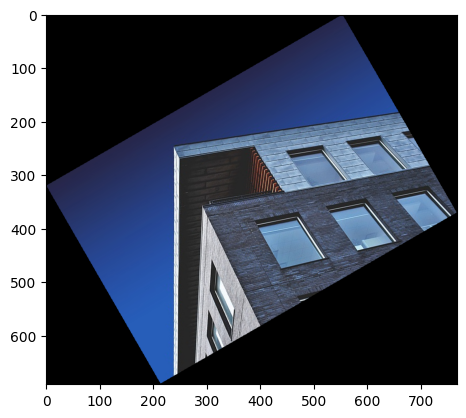

In [6]:
Ib=cv2.imread('building-1081868_640.jpg')
Ib=cv2.cvtColor(Ib,cv2.COLOR_BGR2RGB)
rIb=ndimage.rotate(Ib,30)
plt.imshow(rIb)

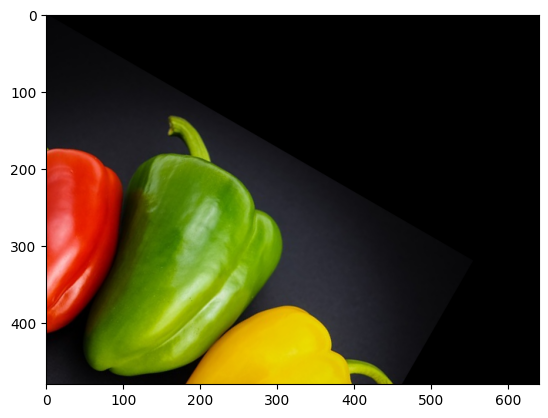

In [7]:
Ip=cv2.imread("paprika-966290_640.jpg")
Ip=cv2.cvtColor(Ip,cv2.COLOR_BGR2RGB)
t=np.pi/6
A=np.array([[np.cos(t),-np.sin(t),0],[np.sin(t),np.cos(t),0]])
h,w,_=Ip.shape
aIp=cv2.warpAffine(Ip,A,(w,h))
plt.imshow(aIp)

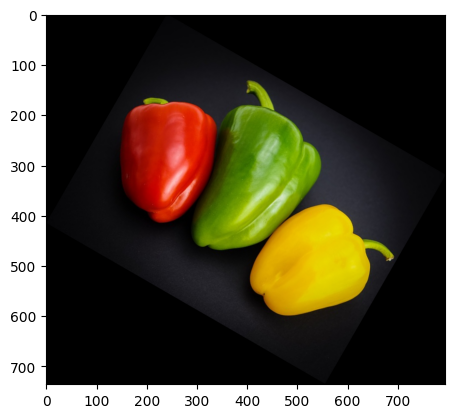

In [8]:
rect=[[0,w,w,0],[0,0,h,h],[1,1,1,1]]
p=A@rect
s=np.min(p,axis=1)
A2=A.copy()
A2[:,2]=-s
pp=p+np.array([s]).T
sz=np.int32(np.ceil(np.max(pp,axis=1)-np.min(pp,axis=1)))
aIp2=cv2.warpAffine(Ip,A2,(sz[0],sz[1]))
plt.imshow(aIp2)

In [9]:
tIb=cv2.imread('estimate_trans_building.png')
tIb=cv2.cvtColor(tIb,cv2.COLOR_BGR2RGB)
px.imshow(tIb,aspect='equal')

In [10]:
px.imshow(Ib,aspect='equal')

In [11]:
u=np.array([[1026,464,1],[1191,393,1],[1058,367,1]])
x=np.array([[305,354,1],[381,377,1],[377,287,1]])
A=np.linalg.inv(x.T@x)@x.T@u
A.T

array([[ 1.74733254e+00,  1.40011855e+00, -2.57839360e+00],
       [-1.03556609e+00,  3.34914049e-01,  6.61288085e+02],
       [-8.32667268e-17,  4.16333634e-17,  1.00000000e+00]])

In [12]:
M=A.T[0:2,:]
M

array([[ 1.74733254e+00,  1.40011855e+00, -2.57839360e+00],
       [-1.03556609e+00,  3.34914049e-01,  6.61288085e+02]])

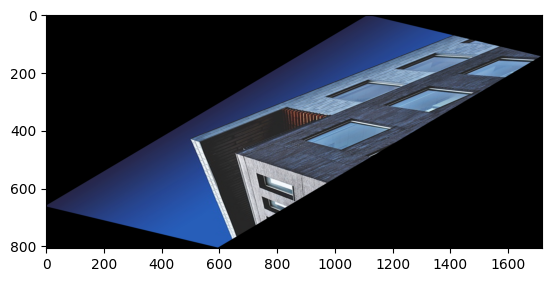

In [13]:
h,w,_=Ib.shape
rect=[[0,w,w,0],[0,0,h,h],[1,1,1,1]]
p=M@rect
sz=np.int32(np.ceil(np.max(p,axis=1)-np.min(p,axis=1)))
aIb=cv2.warpAffine(Ib,M,(sz[0],sz[1]))
plt.imshow(aIb)

In [14]:
M=cv2.getAffineTransform(np.float32(x[:,0:2]),np.float32(u[:,0:2]))
M

array([[ 1.74733254e+00,  1.40011855e+00, -2.57839360e+00],
       [-1.03556609e+00,  3.34914049e-01,  6.61288085e+02]])

In [15]:
p=M@rect
p

array([[-2.57839360e+00,  1.11571443e+03,  1.71496517e+03,
         5.96672347e+02],
       [ 6.61288085e+02, -1.47421458e+00,  1.41868998e+02,
         8.04631298e+02]])

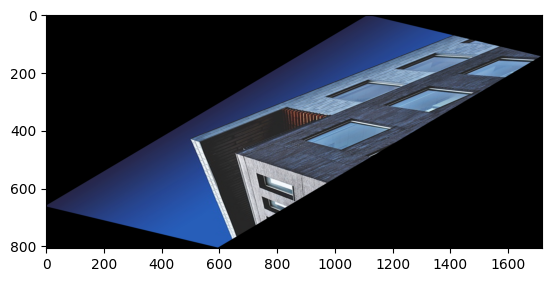

In [16]:
sz=np.int32(np.ceil(np.max(p,axis=1)-np.min(p,axis=1)))
aIb2=cv2.warpAffine(Ib,M,(sz[0],sz[1]))
plt.imshow(aIb2)

In [17]:
A,_,_,_=np.linalg.lstsq(x,u,rcond=-1)
A.T

array([[ 1.74733254e+00,  1.40011855e+00, -2.57839360e+00],
       [-1.03556609e+00,  3.34914049e-01,  6.61288085e+02],
       [ 1.14750869e-18,  4.33680869e-19,  1.00000000e+00]])

In [18]:
u

array([[1026,  464,    1],
       [1191,  393,    1],
       [1058,  367,    1]])

In [19]:
x@A

array([[1.026e+03, 4.640e+02, 1.000e+00],
       [1.191e+03, 3.930e+02, 1.000e+00],
       [1.058e+03, 3.670e+02, 1.000e+00]])

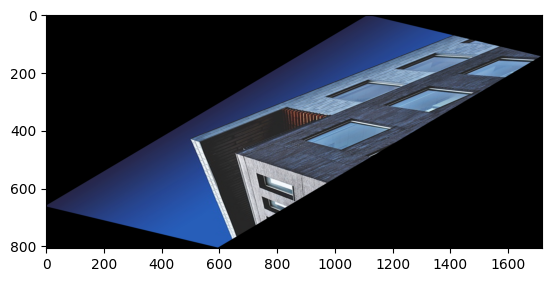

In [20]:
M=A.T[0:2,:]
p=M@rect
sz=np.int32(np.ceil(np.max(p,axis=1)-np.min(p,axis=1)))
aIb3=cv2.warpAffine(Ib,M,(sz[0],sz[1]))
plt.imshow(aIb3)

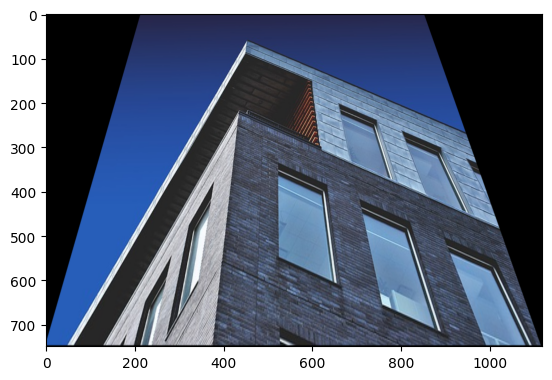

In [21]:
M=np.array([[1,0,0],[-0.5,1,-0.001],[213,0,1]])
h,w,_=Ib.shape
rect=[[0,w,w,0],[0,0,h,h],[1,1,1,1]]
p=M.T@rect
p=p[0:2,:]/p[2,:]
sz=np.int32(np.ceil(np.max(p,axis=1)-np.min(p,axis=1)))
pIb=cv2.warpPerspective(Ib,M.T,(sz[0],sz[1]))
plt.imshow(pIb)

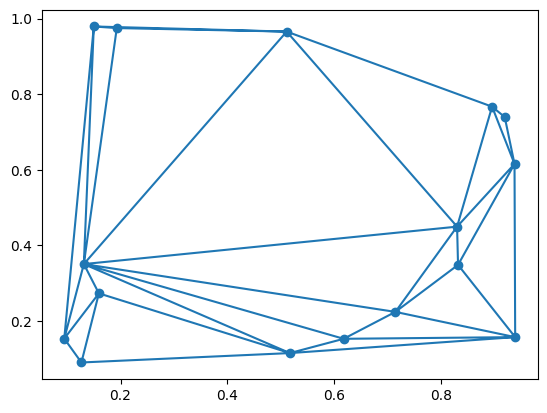

In [22]:
x=np.random.random((1,16))
y=np.random.random((1,16))
pts=np.hstack((x.T,y.T))
tri=spatial.Delaunay(pts)
plt.scatter(x,y)
plt.triplot(x[0,:],y[0,:])

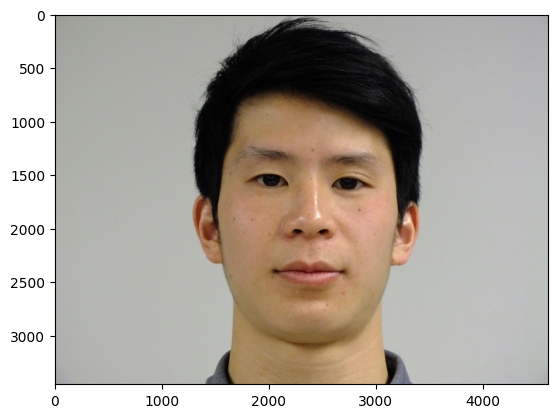

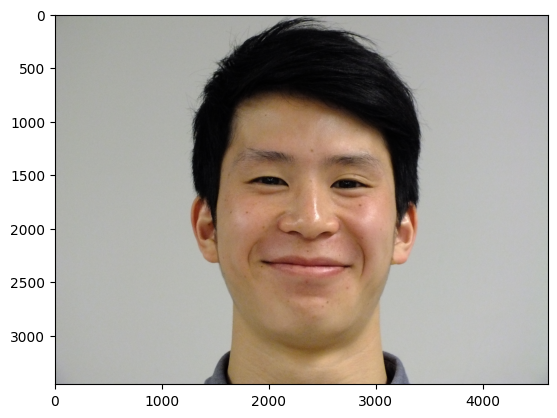

In [23]:
b1=cv2.imread('DSCF6600_normal.JPG')
rb1=cv2.cvtColor(b1,cv2.COLOR_BGR2RGB)
b2=cv2.imread('DSCF6601_smile.JPG')
rb2=cv2.cvtColor(b2,cv2.COLOR_BGR2RGB)
plt.imshow(rb1)
plt.figure(); plt.imshow(rb2)

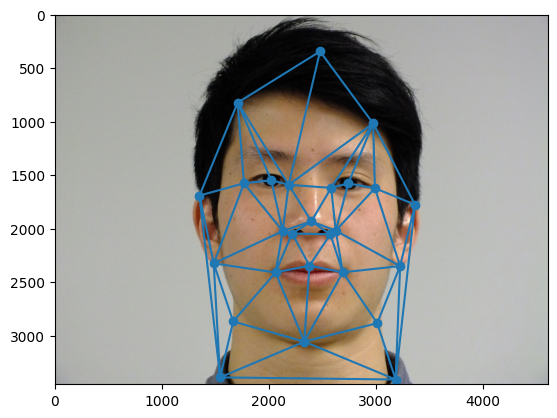

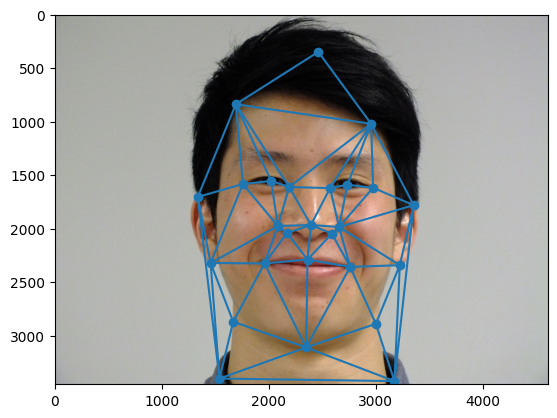

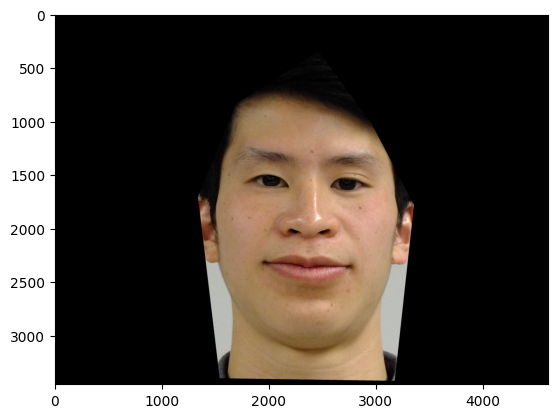

In [24]:
b1=np.loadtxt("cpp_face.csv",delimiter=",",usecols=(0,1))
b2=np.loadtxt("cpp_face.csv",delimiter=",",usecols=(2,3))
tri=spatial.Delaunay(b1)
trj=spatial.Delaunay(b2)
plt.imshow(rb1)
plt.triplot(b1[:,0],b1[:,1])
plt.scatter(b1[:,0],b1[:,1])
plt.figure()
plt.imshow(rb2)
plt.triplot(b2[:,0],b2[:,1])
plt.scatter(b2[:,0],b2[:,1])
tform=ski.transform.PiecewiseAffineTransform()
tform.estimate(b2,b1)
h,w,_=rb1.shape
rb2_from_rb1=ski.transform.warp(rb1,tform,output_shape=(h,w))
plt.figure()
plt.imshow(rb2_from_rb1)

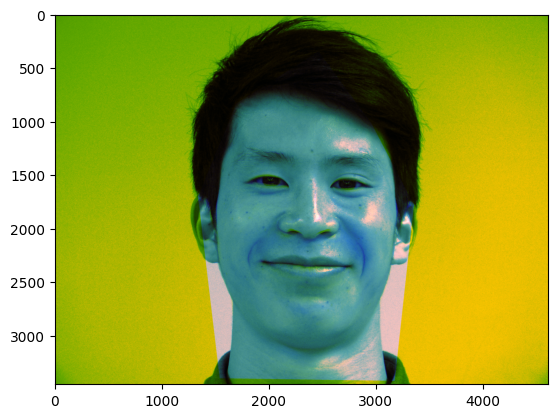

In [25]:
c1=cv2.cvtColor(rb2,cv2.COLOR_RGB2GRAY)
c2=np.uint8(rb2_from_rb1*255)
c2=cv2.cvtColor(c2,cv2.COLOR_RGB2GRAY)
c11=cv2.equalizeHist(c1)
d=np.zeros(rb2.shape,dtype=np.uint8)
d[:,:,0]=c11
d[:,:,1]=c1
d[:,:,2]=c2
plt.imshow(d)

[[ 0.22061359  0.54964303  0.        ]
 [ 0.32658305 -0.69404687  0.        ]]


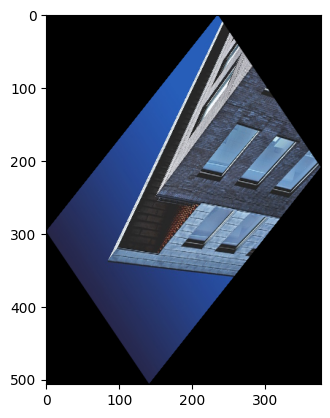

In [26]:
M=np.vstack((np.hstack((np.random.random((2,2))*2-np.ones((2,2)),
                        np.zeros((2,1))))))
print(M)
h,w,_=Ib.shape
rect=[[0,w,w,0],[0,0,h,h],[1,1,1,1]]
p=M@rect
s=np.min(p,axis=1)
M[:,2]=-s
sz=np.int32(np.ceil(np.max(p,axis=1)-np.min(p,axis=1)))
aIb4=cv2.warpAffine(Ib,M,(sz[0],sz[1]))
plt.imshow(aIb4)